# Implementando la propagación de la afinidad

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import AffinityPropagation
from sklearn import metrics
from sklearn.datasets.samples_generator import make_blobs
from itertools import cycle

In [39]:
# generar datos aleatoriamente
centers = [[1,1],[-1,-1],[1,-1]]
X, labels = make_blobs(n_samples=300, centers=centers, cluster_std=0.5,random_state=0)

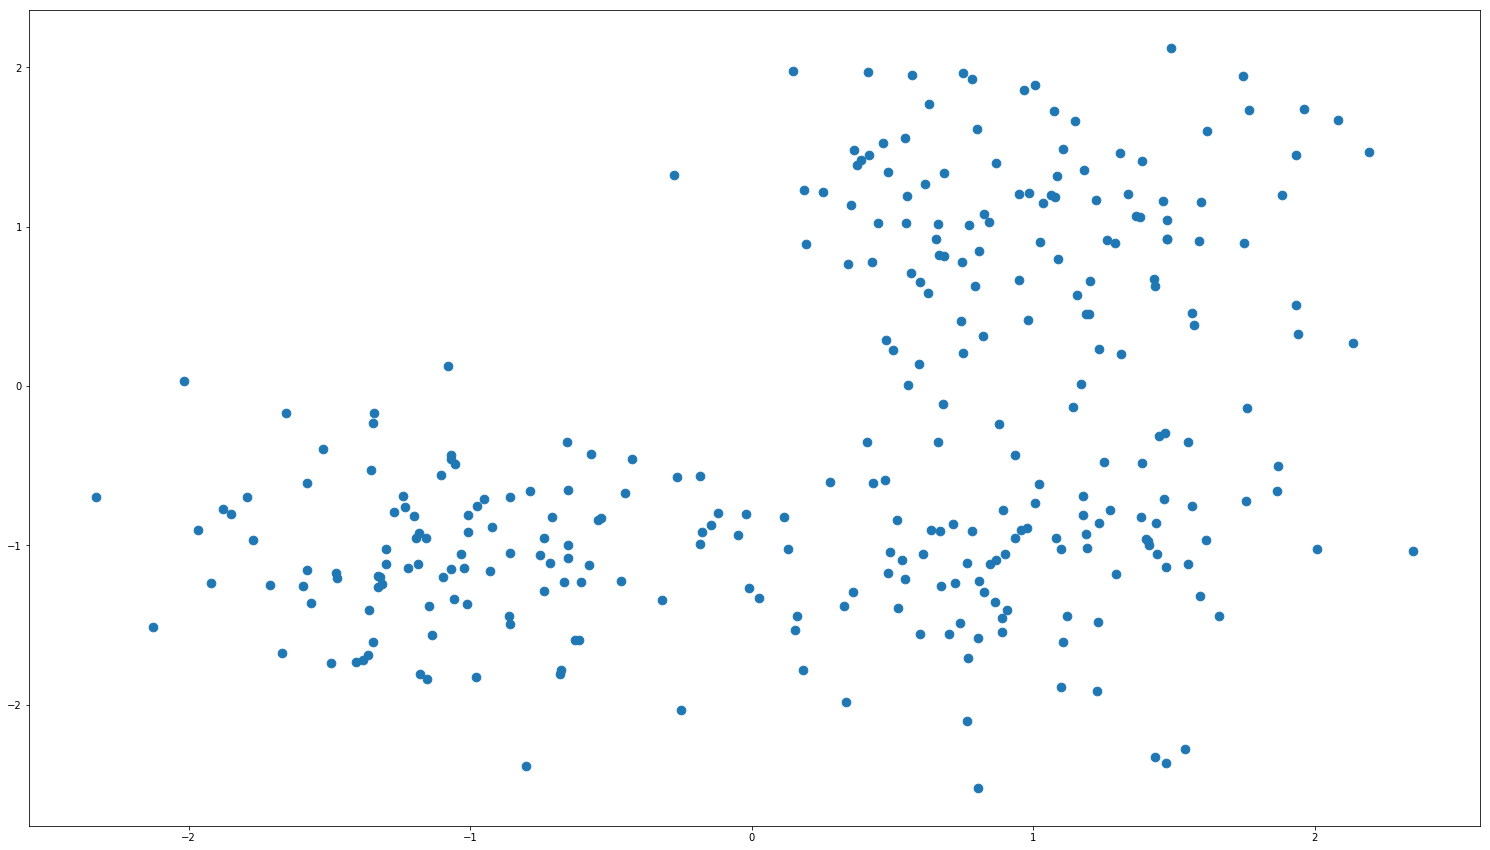

In [40]:
plt.figure(figsize=(26,15))
plt.scatter(X[:,0],X[:,1], cmap="autumn", s=75)

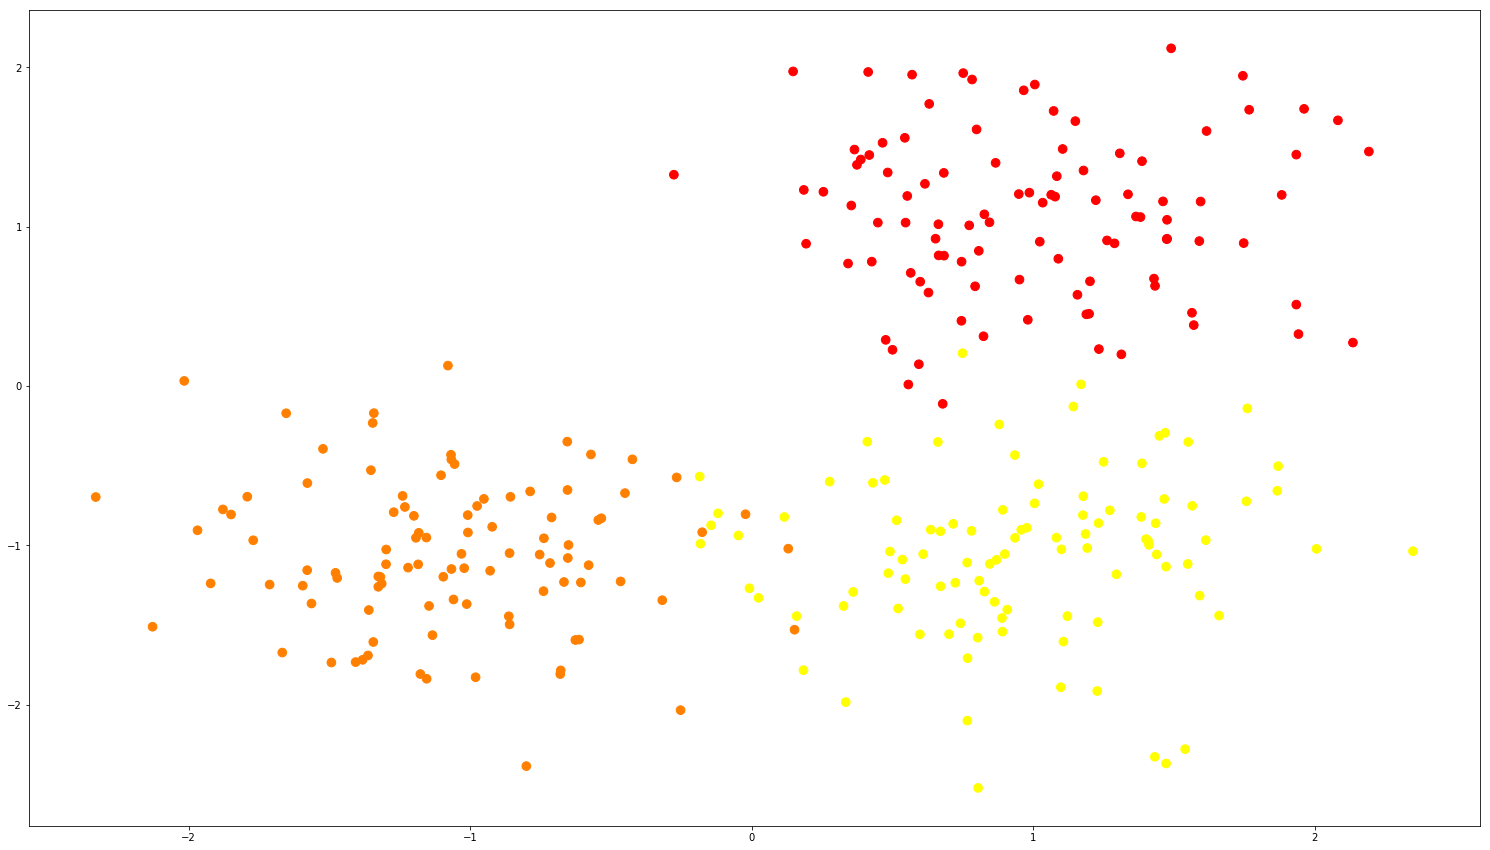

In [41]:
plt.figure(figsize=(26,15))
plt.scatter(X[:,0],X[:,1], c=labels, cmap="autumn", s=75)

In [42]:
af = AffinityPropagation(preference=-50).fit(X)

In [43]:
cluster_centers_id = af.cluster_centers_indices_

In [44]:
X[cluster_centers_id]

array([[ 1.03325861,  1.15123595],
       [ 0.93494652, -0.95302339],
       [-1.18459092, -1.11968959]])

In [45]:
clust_labels = af.labels_

In [46]:
n_clust = len(cluster_centers_id)
n_clust

3

In [81]:
def report_affinity_propagesion(X):
    af = AffinityPropagation(preference=-50).fit(X)
    cluster_centers_id = af.cluster_centers_indices_
    n_clust = len(cluster_centers_id)
    cluster_centers_id = af.cluster_centers_indices_
    clust_labels = af.labels_
    print("Numero estimado de cluster ",n_clust)
    print("Homogeneidad del cluster %0.3f"%metrics.homogeneity_score(labels, clust_labels))
    print("Completitud %0.3f"%metrics.completeness_score(labels,clust_labels))
    print("V-Measure %0.3f"%metrics.v_measure_score(labels,clust_labels))
    print("Adjusted R2 %0.3f"% metrics.adjusted_rand_score(labels,clust_labels))
    print("Informacion mutua ajustada %0.3f"% metrics.adjusted_mutual_info_score(labels,clust_labels))
    print("Coeficiente de la silueta %0.3f"%metrics.silhouette_score(X,labels,metric="sqeuclidean"))
    
    plt.figure(figsize=(26,15))
    plt.clf()
    colors = cycle("bgrcmykbgrcmykbgrcmykbgrcmykbgrcmykbgrcmyk")
    for k,col in zip(range(n_clust),colors):
        clust_member = (clust_labels == k)
        clust_center = X[cluster_centers_id[k]]
        plt.plot(X[clust_member,0],X[clust_member,1], col +'.')
        plt.plot(clust_center[0],clust_center[1], "o", markerfacecolor=col,markeredgecolor="k", markersize=14)
        for x in X[clust_member]:
            plt.plot([clust_center[0], x[0]],[clust_center[1],x[1]], col)
    plt.title("Numero estimado de cluster %d"%n_clust)
#    plt.scatter(X[:,0],X[:,1], c=labels, cmap="autumn", s=75)

Numero estimado de cluster  3
Homogeneidad del cluster 0.872
Completitud 0.872
V-Measure 0.872
Adjusted R2 0.912
Informacion mutua ajustada 0.871
Coeficiente de la silueta 0.735


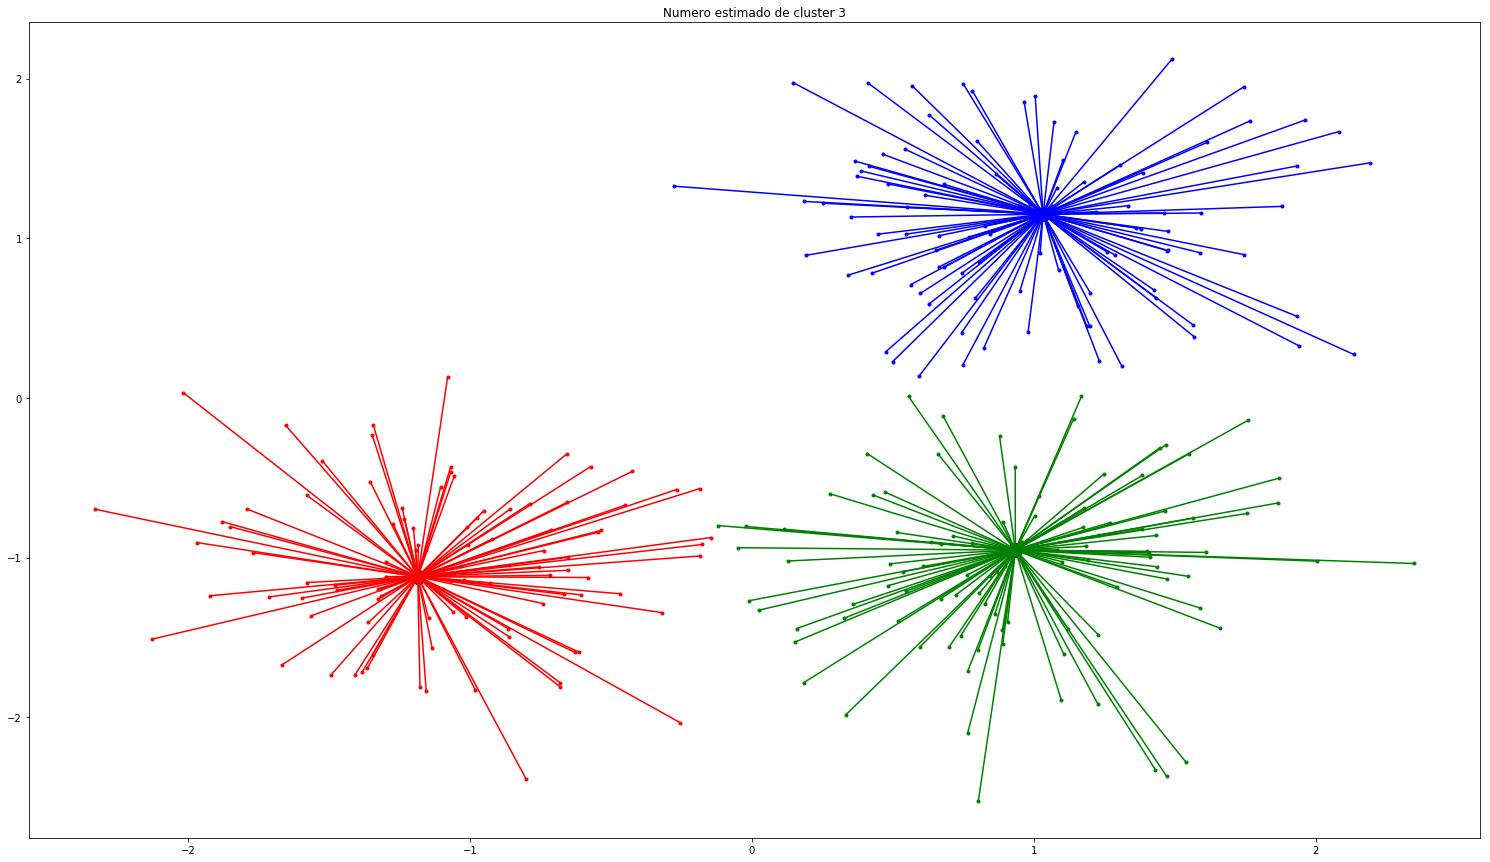

In [82]:
report_affinity_propagesion(X)